In [1]:
!pip install yfinance

  Using cached lxml-4.9.1-cp39-cp39-macosx_10_15_x86_64.whl (4.6 MB)


In [2]:
!pip install matplotlib

In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format


# berkshire hathaway inc. (b stock)


ypf_finance = yf.Ticker('ypf')
hist_preestatizacion = ypf_finance.history(start='2000-01-01', end='2022-08-24', auto_adjust=True)

In [5]:
hist_preestatizacion.reset_index(inplace=True)
hist_preestatizacion['Year'] = hist_preestatizacion['Date'].dt.year
hist_preestatizacion['Month'] = hist_preestatizacion['Date'].dt.month
hist_preestatizacion = hist_preestatizacion.reindex(columns=['Year','Month','Date','Open','High','Low','Close', 'Volume','Dividends']) #Saque "Stock Splits", todos los valores = 0"
hist_preestatizacion

,Year,Month,Date,Open,High,Low,Close,Volume,Dividends
0,2000,1,2000-01-03,11.65,11.65,11.49,11.53,52400,0.00
1,2000,1,2000-01-04,11.47,11.47,11.43,11.45,18300,0.00
2,2000,1,2000-01-05,11.37,11.59,11.31,11.51,42000,0.00
3,2000,1,2000-01-06,11.47,11.47,11.35,11.43,6400,0.00
4,2000,1,2000-01-07,11.39,11.67,11.37,11.55,8800,0.00
...,...,...,...,...,...,...,...,...,...
5692,2022,8,2022-08-17,4.61,4.72,4.50,4.64,2434100,0.00
5693,2022,8,2022-08-18,4.65,4.94,4.65,4.85,2554100,0.00
5694,2022,8,2022-08-19,4.79,4.79,4.61,4.65,1595400,0.00
5695,2022,8,2022-08-22,4.59,4.86,4.47,4.77,2282600,0.00


<AxesSubplot:xlabel='Year,Month'>

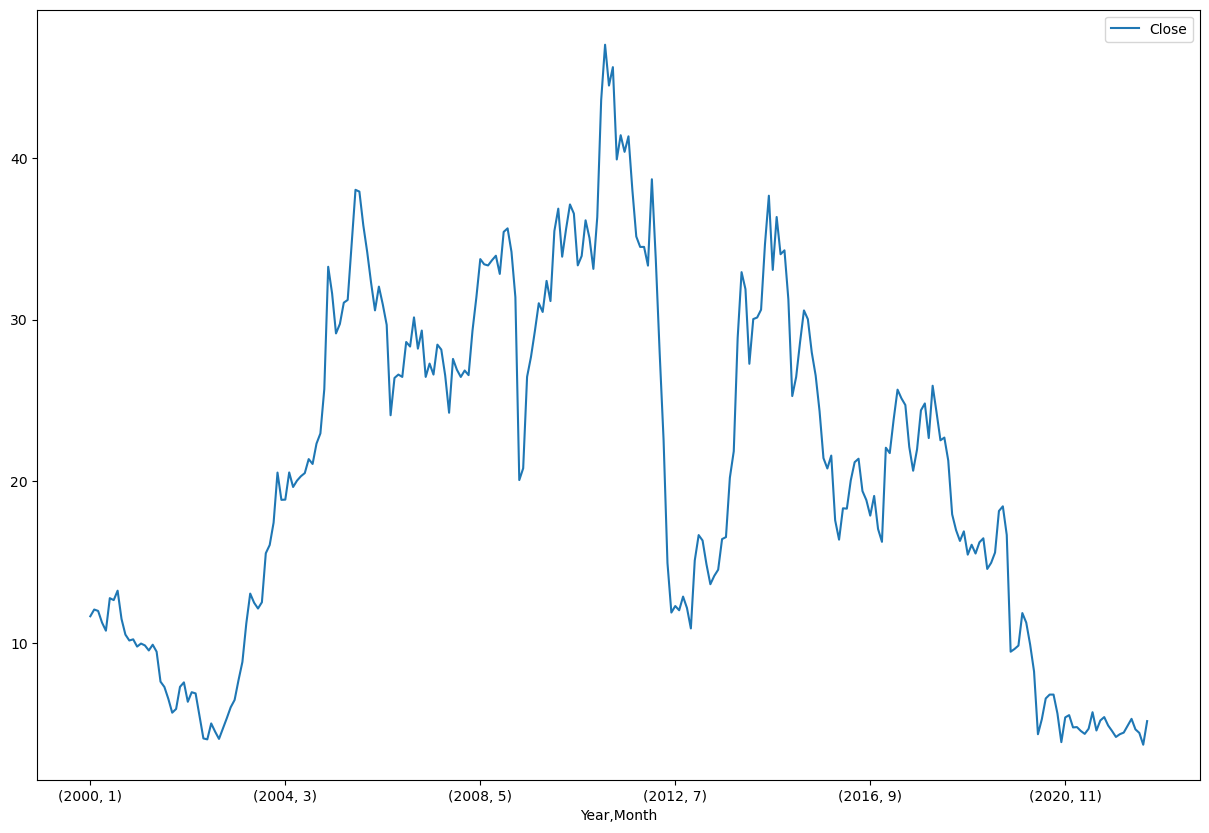

In [6]:
hist_preestatizacion = hist_preestatizacion.groupby(['Year','Month']).agg({'Close': max})
hist_preestatizacion.plot(figsize=(15,10))